In [269]:
# importing dependencies
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

In [240]:
# a global function to calculate the distance
def eucledian_distance(x1,x2):
  distance = np.sqrt(np.sum((x1-x2)**2))
  return np.sqrt(np.sum((x1-x2)**2))

# class of K-means cluster
class ScratchKMeans():
    def __init__(self, k=5, max_iters=100, verbose=False):
        self.k = k
        self.max_iters = max_iters
        self.verbose = verbose
        self.sse = []
        
        # initializing an empty list of sample indeces for each cluster
        self.clusters = [[] for _ in range(self.k)]
        
        # a list to store the mean of feature vector 
        self.centroids = []
        
    def fit(self, X):
        if self.verbose:
            print()
        return
    
    def fit_predict(self,X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        # initialize the centroids
        random_samples_idxs = np.random.choice(self.n_samples, self.k, replace=False)
        self.centroids = [self.X[idx] for idx in random_samples_idxs]
        
        # optimization
        for _ in range(self.max_iters):
            # update cluster
            self.clusters = self._create_clusters(self.centroids)
            
            # update centroids
            # store old centroids
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            # check for if the centroids are not changing anymore(and stop)
            if self._is_converged(centroids_old, self.centroids):
              # calculating the sse
              for i,cluster in enumerate(self.clusters):
                for sample_idx in cluster:
                  self.sse.append(eucledian_distance(X[sample_idx],self.centroids[i]))
              break
        return self._get_cluster_labels(self.clusters)
    
    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.k)]
        for idx, sample in enumerate(self.X):
            # getting closest centroids index
            centroids_idx = self._closest_centroid(sample, centroids)
            clusters[centroids_idx].append(idx)
        return clusters
    
    def _closest_centroid(self, sample, centroids):
        # calc distance of all samples to the centroids
        distances = [eucledian_distance(sample,point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx
    
    def _get_centroids(self,clusters):
        centroids = np.zeros((self.k, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids
    
    def _is_converged(self, centroids_old, centroids):
        distances = [eucledian_distance(centroids_old[i], centroids[i]) for i in range(self.k)]
        return sum(distances) == 0
    
    def _get_cluster_labels(self,clusters):
        labels = np.empty(self.n_samples)
        for cluster_idx,cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
        return labels
    
    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color='black', linewidth=2)

        plt.show()

In [75]:
# splitting our dataset
X,_ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

### [Problem 1] Determine the initial value of the center point

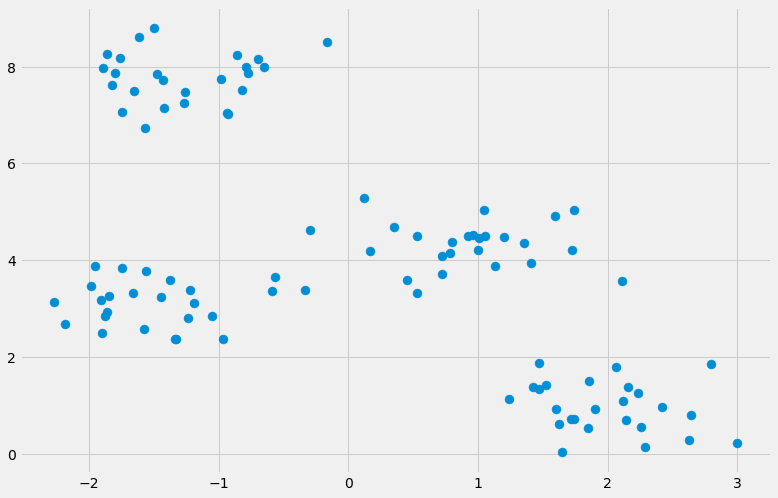

In [76]:
# visualize the dataset
fig = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 20
plt.scatter(X[:,0],X[:,1],s=80);

In [77]:
k = 4
center_points = X[np.random.choice(len(X),size=k,replace=False)]
print("randomly selected center points: ", center_points)

randomly selected center points:  [[ 1.74265969  5.03846671]
 [-0.93564005  7.03443119]
 [-1.6609057   3.31911046]
 [-0.59312453  3.37090459]]


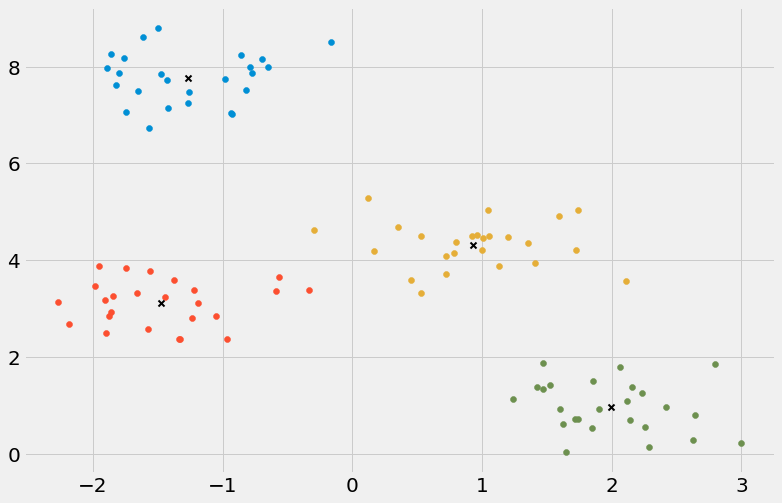

In [81]:
clusters = len(np.unique(_))
k = ScratchKMeans(k=4, max_iters=150, verbose=True)
y_pred = k.fit_predict(X)
k.plot()

the k = 1
sse = 724.4347502053137
the k = 2
sse = 377.47289194592383
the k = 3
sse = 228.80107386691608
the k = 4
sse = 217.98741687451817


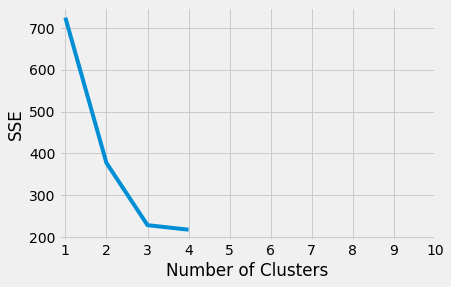

In [176]:
# Problem 8 elbow method
sse = []
for k in range(1, 5):
  k2 = ScratchKMeans(k, max_iters=150, verbose=True)
  y_pred2 = k2.fit_predict(X)
  sse.append(sum(k2.sse))
  print("the k =",k)
  print("sse =",sum(k2.sse))
plt.style.use("fivethirtyeight")
plt.plot(range(1, 5), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

From the judgement of the elbow method shown above the best k value is 3

In [195]:
data = pd.read_csv("Wholesale customers data.csv")
pca = PCA(n_components = 2)
pca = pca.fit(data)
data_pca = pca.transform(data)

In [194]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [196]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


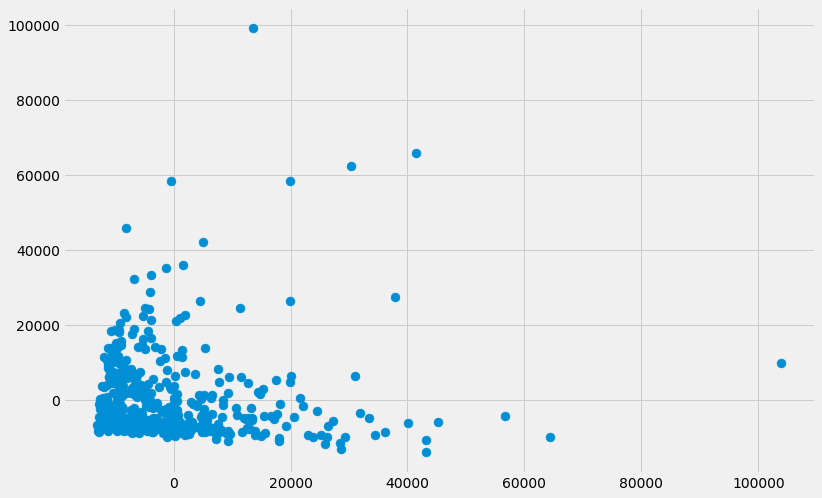

In [203]:
fig = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 20
plt.scatter(data_pca[:,0],data_pca[:,1],s=80);

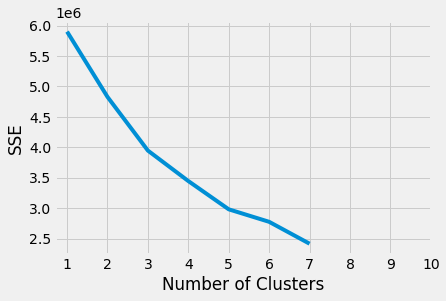

In [249]:
sse2 = []
for k in range(1, 8):
  k3 = ScratchKMeans(k, max_iters=150, verbose=True)
  y_pred3 = k3.fit_predict(data_pca)
  sse2.append(sum(k3.sse))
plt.style.use("fivethirtyeight")
plt.plot(range(1, 8), sse2)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

From the elbow method i would choose 3 to be the number of k

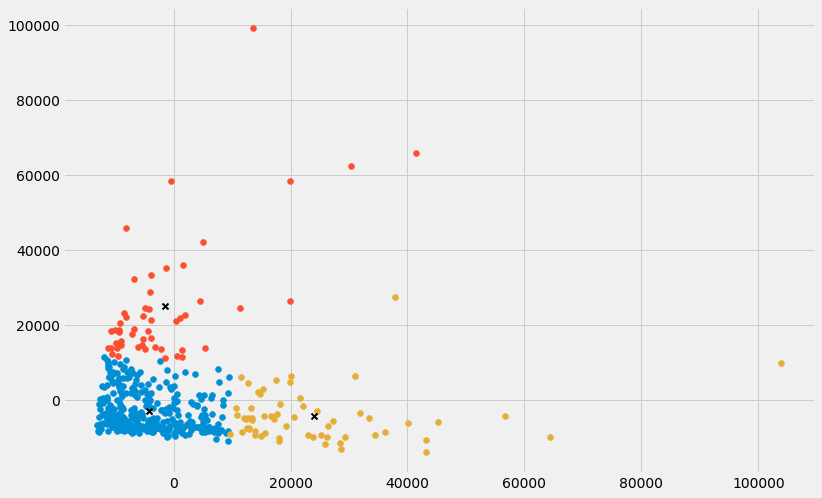

In [250]:
k4 = ScratchKMeans(k=3, max_iters=150, verbose=True)
y_pred3 = k4.fit_predict(data_pca)
k4.plot()

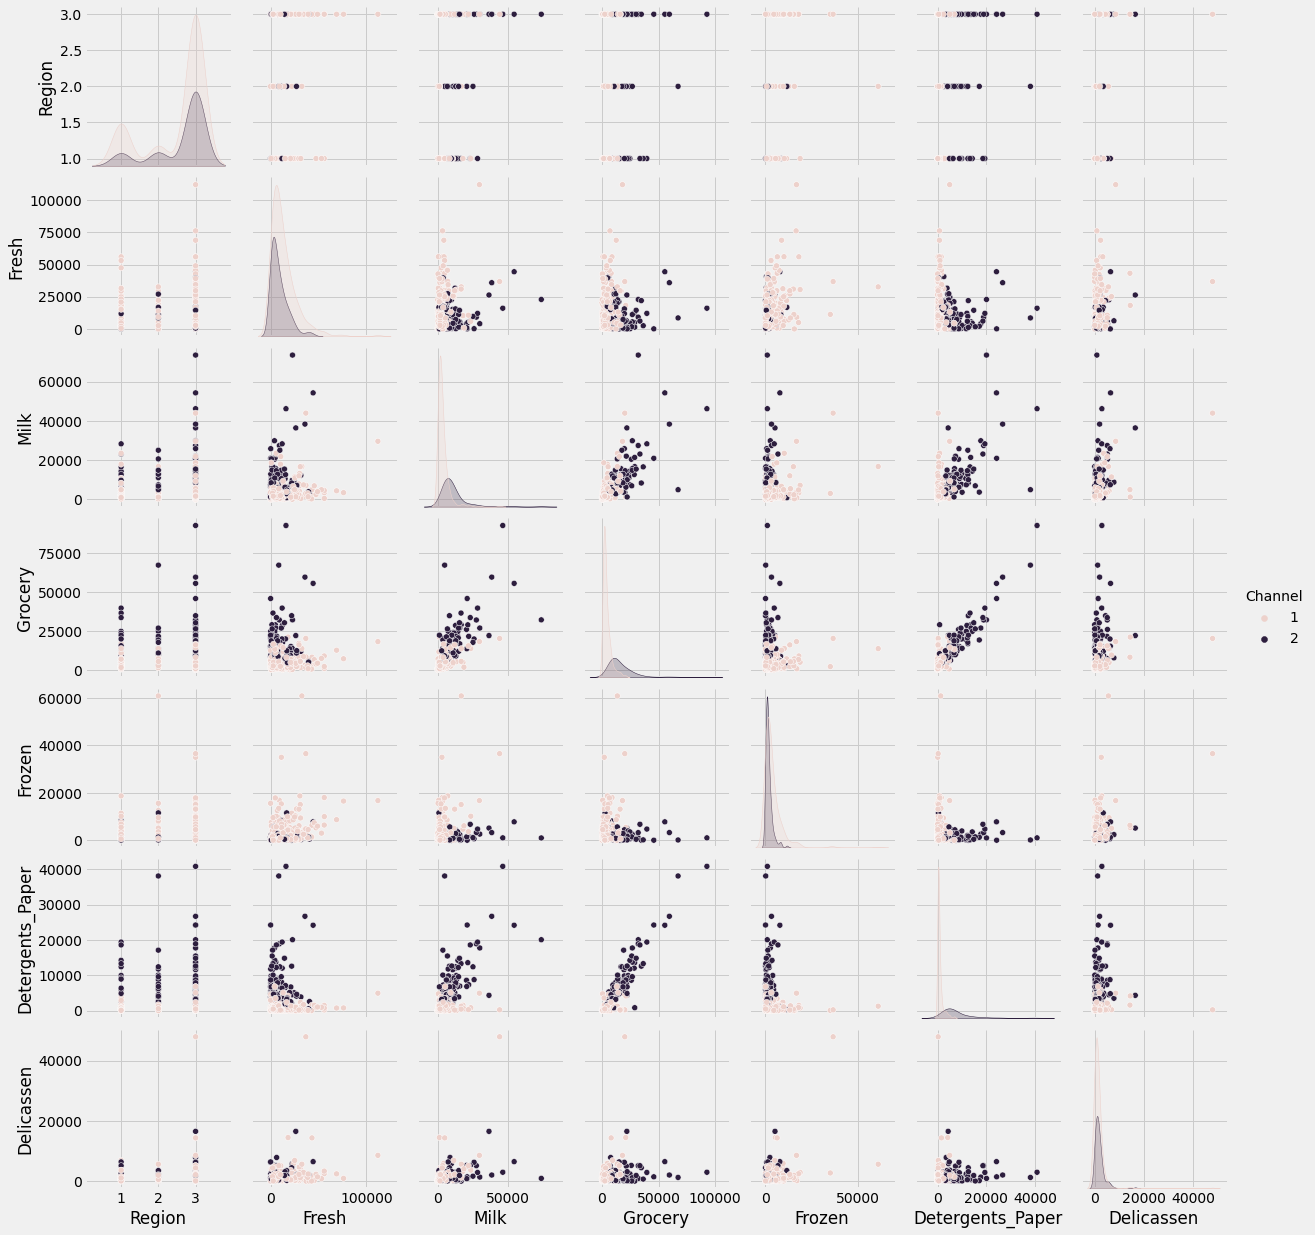

In [252]:
# [Problem 11] Comparison with known groups
sns.pairplot(data,hue='Channel');

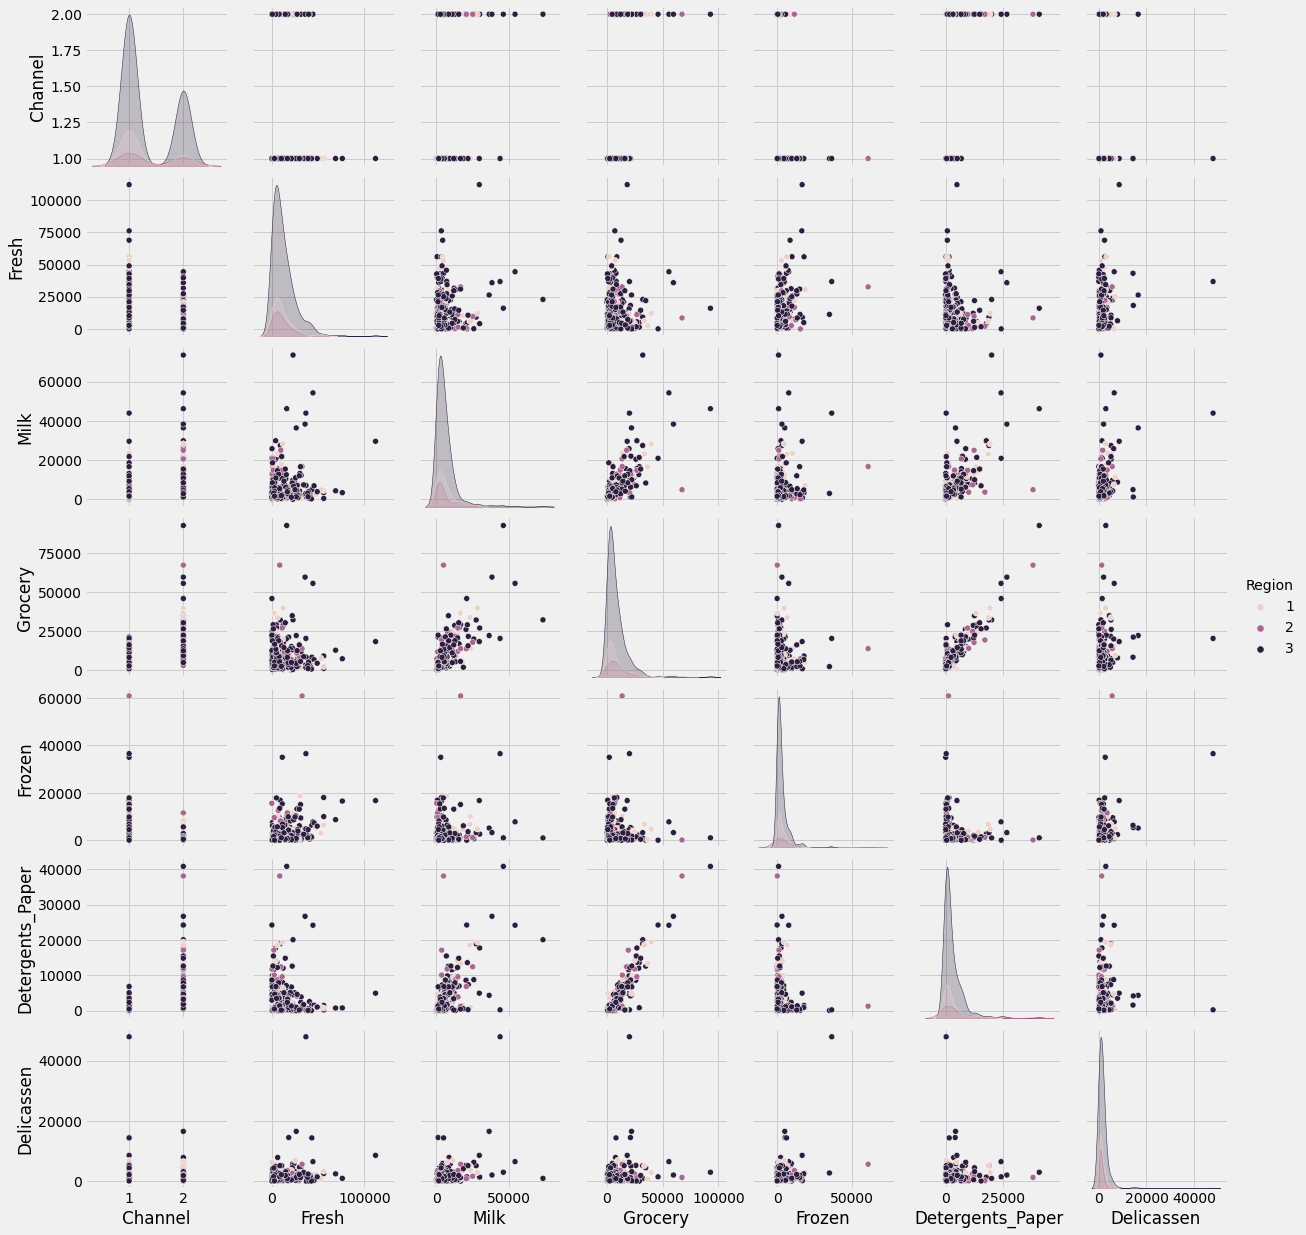

In [253]:
sns.pairplot(data,hue='Region');

In [254]:
data.groupby(['Channel','Region']).count()

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
Channel Region                                                            
1       1          59    59       59      59                59          59
        2          28    28       28      28                28          28
        3         211   211      211     211               211         211
2       1          18    18       18      18                18          18
        2          19    19       19      19                19          19
        3         105   105      105     105               105         105

In [266]:
# add clusters to the dataset
data['clusters'] = y_pred3[:,]
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters
0,2,3,12669,9656,7561,214,2674,1338,0.0
1,2,3,7057,9810,9568,1762,3293,1776,0.0
2,2,3,6353,8808,7684,2405,3516,7844,0.0
3,1,3,13265,1196,4221,6404,507,1788,0.0
4,2,3,22615,5410,7198,3915,1777,5185,2.0


clusters looks data differently and takes into account attributes and trends which are not so abovious like region. so the results obtained by using the clustering method might differ from the results done by using the obvious categorization

In [268]:
# [Problem 12] Useful information for wholesalers
data.groupby(['clusters']).count()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
clusters,,,,,,,,
0.0,328,328,328,328,328,328,328,328
1.0,52,52,52,52,52,52,52,52
2.0,60,60,60,60,60,60,60,60


### [Problem 13] (Advance assignment) Investigation of other methods

**Advantages of DBSCAN**
1. DBSCAN does not require one to specify the number of clusters in the data a priori, as opposed to k-means.
2. DBSCAN can find arbitrarily-shaped clusters. It can even find a cluster completely surrounded by (but not connected to) a different cluster. Due to the MinPts parameter, the so-called single-link effect (different clusters being connected by a thin line of points) is reduced

**Disadvantages of DBSCAN**
1. border points that are reachable from more than one cluster can be part of either cluster, depending on the order the data are processed.
2. DBSCAN cannot cluster data sets well with large differences in densities

**Advantages of t-SNE**
1. maintain local distances of the data
2. Preserves the local structure

**Disadvantages of t-SNE**
1. t-SNE algorithm is slow due to nearest neighbor search queries

In [271]:
#[Problem 14] (Advance assignment) Use of t-SNE and DBSCAN
X_embedded = TSNE(n_components=2).fit_transform(X)
clustering = DBSCAN(eps=3, min_samples=2).fit_predict(X_embedded)
clustering

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 2, 0, 1,
       0, 2, 0, 0, 0, 0, 2, 2, 2, 1, 2, 2, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0,
       0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 2, 0, 2, 1,
       0, 0, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0, 2, 0, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0])